In [2]:
import bpy
from IPython.display import display, Image

def fresh_scene():
    # Deselect all objects
    bpy.ops.object.select_all(action='DESELECT')
    # Select all objects except cameras
    for obj in bpy.context.scene.objects:
        if  obj.type != 'CAMERA':
            obj.select_set(True)
        else:
            obj.select_set(False)
    bpy.ops.object.delete()
    
    # add light
    bpy.ops.object.light_add(type='SUN')
    sun = bpy.context.object

    sun.location = (0, 0, 0)
    from math import radians
    sun.rotation_euler = (radians(204), radians(-133), radians(-67))
    sun.data.energy = 5  


def render_result():
    bpy.ops.render.render()
    bpy.data.images['Render Result'].save_render(filepath="img.png")
    display(Image(filename="img.png"))

bpy.context.scene.render.resolution_x = 500
bpy.context.scene.render.resolution_y = 200

# Pipe data

In [35]:
# temp
bpy.ops.wm.save_as_mainfile(filepath="scene.blend")

Info: Saved "scene.blend"


{'FINISHED'}

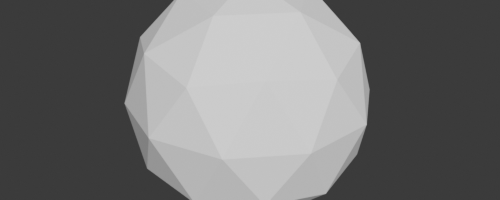

In [5]:
fresh_scene()
bpy.ops.mesh.primitive_ico_sphere_add(radius=2, location=(0, 0, 0)) 
render_result()

and this is how the spreadsheet looks like:

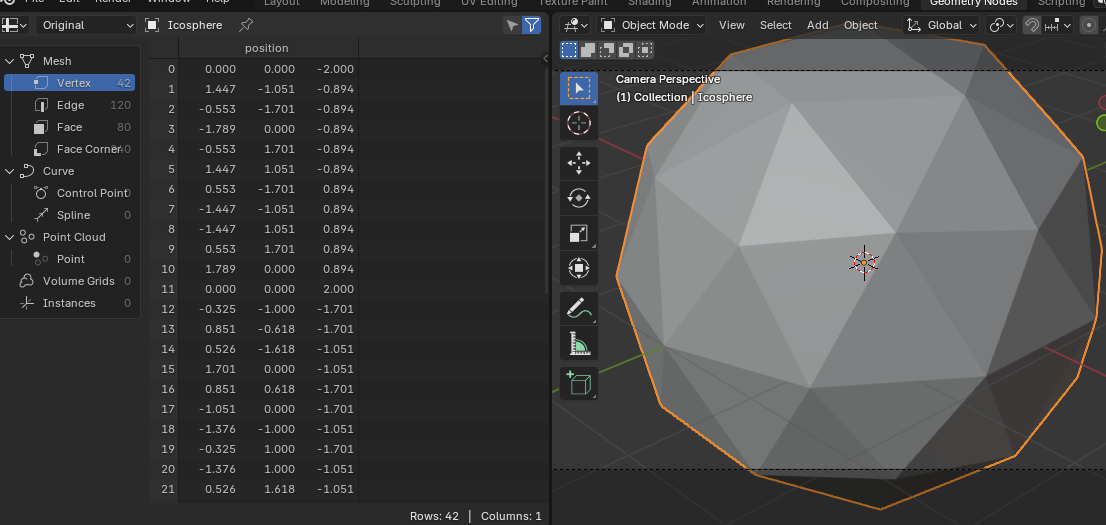

Let's start to pipe data into these vertices!

In [7]:
fresh_scene()
bpy.ops.mesh.primitive_ico_sphere_add(radius=2, location=(0, 0, 0))
obj = bpy.context.object

num_vertices = len(obj.data.vertices)
num_vertices

42

In [20]:
vertices = [(v.co.x, v.co.y, v.co.z) for v in obj.data.vertices]
import pandas as pd
df = pd.DataFrame(vertices, columns=['X', 'Y', 'Z'])
df.head()

,X,Y,Z
0,0.000000,0.000000,-2.000000
1,1.447215,-1.051451,-0.894439
2,-0.552776,-1.701298,-0.894440
3,-1.788852,0.000000,-0.894431
4,-0.552776,1.701298,-0.894440


In [31]:
attr_name = 'easy_float'
value = 3.14

attr = obj.data.attributes.get(attr_name)
if attr is None:
    attr = obj.data.attributes.new(
        name=attr_name,
        type='FLOAT',
        domain='POINT'  # 'POINT' domain means each vertex gets the value
    )

# Storing data here 
values = [value] * len(obj.data.vertices)

attr.data.foreach_set('value', values)

obj.data.update()

print(f"Added attribute '{attr_name}' with value {value} to each vertex.")

Added attribute 'easy_float' with value 3.14 to each vertex.


Now we have that attribute stored!
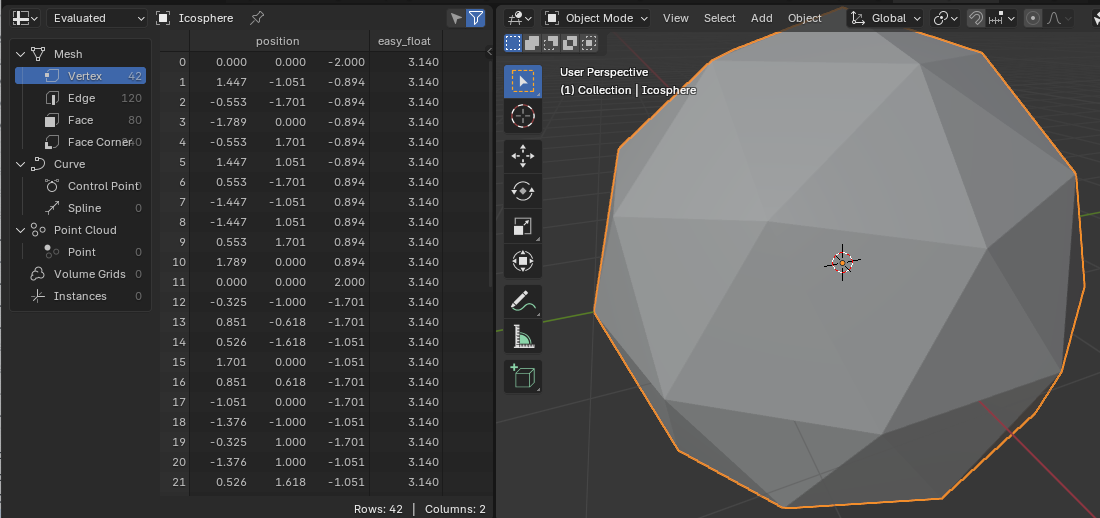

In [40]:
# we can confirm this by checking with a dataframe:
df = pd.DataFrame({
    'X': [v.co.x for v in obj.data.vertices],
    'Y': [v.co.y for v in obj.data.vertices],
    'Z': [v.co.z for v in obj.data.vertices],
    'easy_float': [val.value for val in obj.data.attributes['easy_float'].data]
})

df.head()

,X,Y,Z,easy_float
0,0.000000,0.000000,-2.000000,3.14
1,1.447215,-1.051451,-0.894439,3.14
2,-0.552776,-1.701298,-0.894440,3.14
3,-1.788852,0.000000,-0.894431,3.14
4,-0.552776,1.701298,-0.894440,3.14
